In [1]:
import requests
url = "https://www.starbucks.co.kr/store/getStore.do?r=MS3ZNZ9WON"
payload = {"in_biz_cds":"0",
"in_scodes":"0",
"ins_lat":"37.486645",
"ins_lng":"127.0206312",
"search_text":"",
"p_sido_cd":"01",
"p_gugun_cd":"",
"isError":"true",
"in_distance":"0",
"in_biz_cd":"",
"iend":"1000",
"searchType":"C",
"set_date":"",
"rndCod":"AVZWD9YW9W",
"all_store":"0",
"T03":"0",
"T01":"0",
"T27":"0",
"T12":"0",
"T09":"0",
"T30":"0",
"T05":"0",
"T22":"0",
"T21":"0",
"T10":"0",
"T36":"0",
"T43":"0",
"T48":"0",
"P10":"0",
"P50":"0",
"P20":"0",
"P60":"0",
"P30":"0",
"P70":"0",
"P40":"0",
"P80":"0",
"whcroad_yn":"0",
"P90":"0",
"new_bool":"0"}

url_sido = "https://www.starbucks.co.kr/store/getSidoList.do"
r_sido = requests.post(url_sido, data = {"rndCod" : "DARFPM4INR"}) #스타벅스 전국 시도 관련 데이터

total_store = []
for x in r_sido.json()['list']:
    payload["p_sido_cd"] = x['sido_cd']
    r = requests.post(url,data=payload)
    total_store += r.json()['list']  #payload값 바꿔줘서 시도 바꿔가면서 데이터 받고 total_store에 넣기

In [3]:
import pandas as pd
starbucks_total = []
for tmp in total_store:
    total_dict = {}
    total_dict['매장명'] = tmp['s_name']
    total_dict['시도'] = tmp['sido_name']
    total_dict['전화번호'] = tmp['tel']
    total_dict['주소'] = tmp['addr']
    total_dict['오픈날짜'] = tmp['open_dt']
    total_dict['위도'] = tmp['lat']
    total_dict['경도'] = tmp['lot']
    
    starbucks_total.append(total_dict)

pd.DataFrame(starbucks_total)

,매장명,시도,전화번호,주소,오픈날짜,위도,경도
0,역삼아레나빌딩,서울,1522-3232,서울특별시 강남구 역삼동 721-13 아레나빌딩,20190613,37.501087,127.043069
1,논현역사거리,서울,1522-3232,서울특별시 강남구 논현동 142-2 정일빌딩,20181123,37.510178,127.022223
2,신사역성일빌딩,서울,1522-3232,서울특별시 강남구 논현동 18-4 성일빌딩,20191219,37.5139309,127.0206057
3,국기원사거리,서울,1522-3232,서울특별시 강남구 역삼동 648-22 동찬빌딩,20190731,37.499517,127.031495
4,대치재경빌딩R,서울,1522-3232,서울특별시 강남구 대치동 599 대원빌딩,20190214,37.494668,127.062583
...,...,...,...,...,...,...,...
1797,세종청사,세종,1522-3232,세종특별자치시 어진동 3-113외 5필지,20140108,36.504565,127.270769
1798,세종아름,세종,1522-3232,"세종특별자치시 아름동 1329 다올비즈니스센터 103,104,105,202,203호",20210226,36.51188,127.24277
1799,세종한솔,세종,1522-3232,세종특별자치시 한솔동 968 공원빌딩,20220929,36.479955,127.253348
1800,세종소담,세종,1522-3232,"세종특별자치시 소담동 539 새샘마을7단지 근린생활시설 -1동 12호,13호,14호...",20210115,36.485755,127.300509


In [4]:
df = pd.DataFrame(starbucks_total)

In [5]:
df.to_excel("korea_star.xlsx")

In [7]:
star_date = pd.read_excel("./korea_star.xlsx")

In [12]:
star_date['year'] = star_date['오픈날짜'].apply(lambda x : str(x)[0:4])

In [13]:
star_date

,Unnamed: 0,매장명,시도,전화번호,주소,오픈날짜,위도,경도,year
0,0,역삼아레나빌딩,서울,1522-3232,서울특별시 강남구 역삼동 721-13 아레나빌딩,20190613,37.501087,127.043069,2019
1,1,논현역사거리,서울,1522-3232,서울특별시 강남구 논현동 142-2 정일빌딩,20181123,37.510178,127.022223,2018
2,2,신사역성일빌딩,서울,1522-3232,서울특별시 강남구 논현동 18-4 성일빌딩,20191219,37.513931,127.020606,2019
3,3,국기원사거리,서울,1522-3232,서울특별시 강남구 역삼동 648-22 동찬빌딩,20190731,37.499517,127.031495,2019
4,4,대치재경빌딩R,서울,1522-3232,서울특별시 강남구 대치동 599 대원빌딩,20190214,37.494668,127.062583,2019
...,...,...,...,...,...,...,...,...,...
1797,1797,세종청사,세종,1522-3232,세종특별자치시 어진동 3-113외 5필지,20140108,36.504565,127.270769,2014
1798,1798,세종아름,세종,1522-3232,"세종특별자치시 아름동 1329 다올비즈니스센터 103,104,105,202,203호",20210226,36.511880,127.242770,2021
1799,1799,세종한솔,세종,1522-3232,세종특별자치시 한솔동 968 공원빌딩,20220929,36.479955,127.253348,2022
1800,1800,세종소담,세종,1522-3232,"세종특별자치시 소담동 539 새샘마을7단지 근린생활시설 -1동 12호,13호,14호...",20210115,36.485755,127.300509,2021


In [14]:
graph  = star_date.value_counts('year').sort_index()
graph

year
1999      1
2000      1
2001     12
2002     12
2003     10
2004     11
2005     15
2006     17
2007     26
2008     29
2009     19
2010     29
2011     67
2012     86
2013    116
2014    143
2015    132
2016    134
2017    149
2018    140
2019    141
2020    150
2021    158
2022    165
2023     39
dtype: int64

In [17]:
from matplotlib import font_manager, rc
font_path = "./한글폰트 설정법/font/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

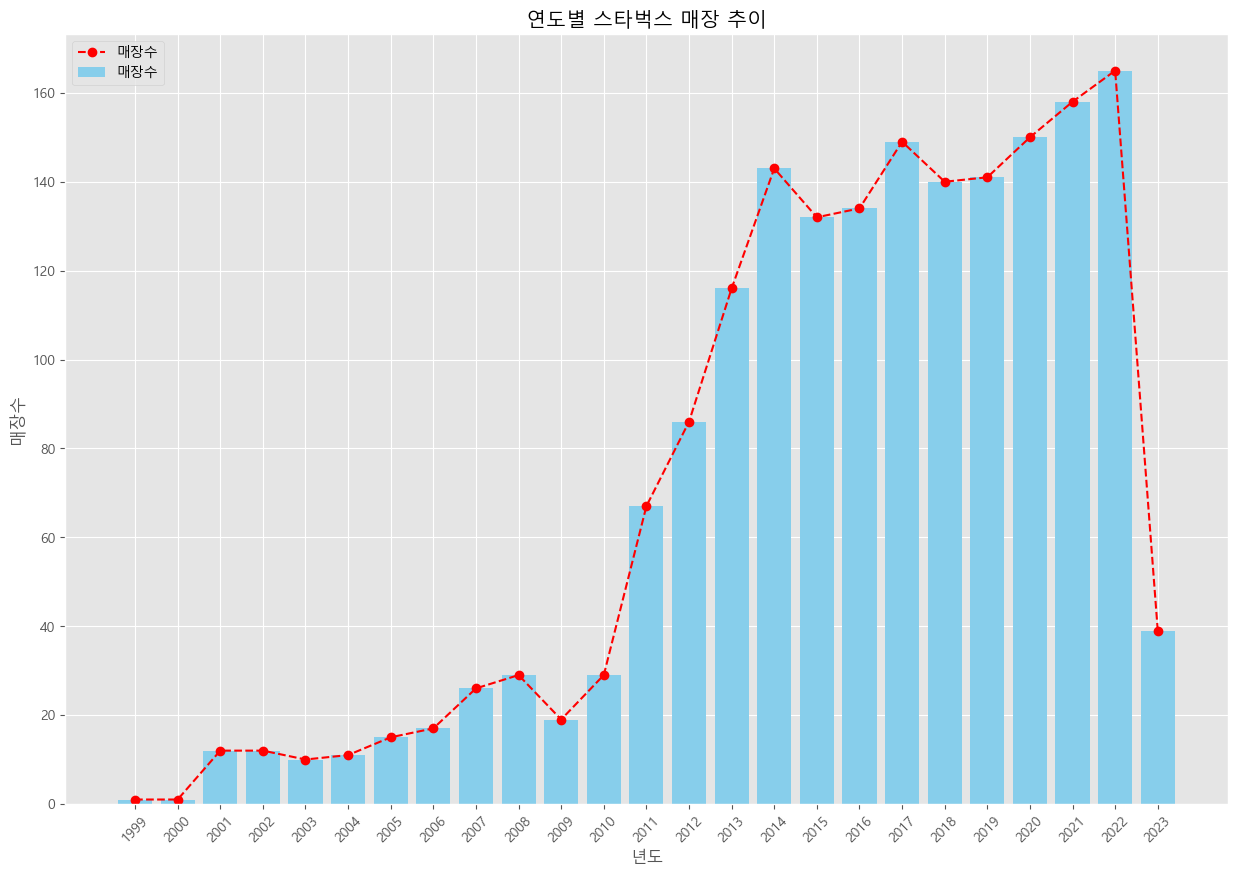

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
x_value_01 = graph.index
y_value_01 = graph.values

# 마커를 포함한 빨간선 대쉬 선 그래프를 그리고, label은 'red line'으로 설정  
plt.plot(x_value_01, y_value_01, color='red', marker='o', linestyle='dashed', label='매장수')
# X값에 따른 Y값을 나타내는 초록색 막대 그래프를 그리고 label은 'bar plot'으로 설정
plt.bar(x_value_01, y_value_01, color='skyblue', label='매장수')
plt.xlabel('년도')
plt.ylabel('매장수')
# 두개의 그래프에서 label설정된 문자열 값을 범례로 표시
plt.xticks(ticks=x_value_01, rotation=45)
plt.legend()

plt.title('연도별 스타벅스 매장 추이')

plt.show()